In [195]:
import re
import pandas as pd
import numpy as np

def clean_text(column):
    for row in column:
# Split CamelCase Characters like ConcatenationOperator to Concatenation Operator
        row = re.sub('([A-Z][a-z]+)', r' \1', re.sub('([A-Z]+)', r' \1',  str(row))).split()
        row = ' '.join(row)

# Replace tabs and newlines with a single space
        row = re.sub("(\\t)", " ", str(row)).lower()
        row = re.sub("(\\r)", " ", str(row)).lower()
        row = re.sub("(\\n)", " ", str(row)).lower()

# Remove the special characters and numbers 
        row = re.sub(r"[<>()|&©ø\[\]\'\",.\}`$\{;@?~*!+=_\//1234567890]", " ", str(row)).lower()

# Remove Repeated words
        row = re.sub(r"\\b(\\w+)(?:\\W+\\1\\b)+", "", str(row)).lower()

# Remove punctuation at the end of a word
        row = re.sub("(\.\s+)", " ", str(row)).lower()
        row = re.sub("(\-\s+)", " ", str(row)).lower()
        row = re.sub("(\:\s+)", " ", str(row)).lower()

# Remove multiple spaces
        row = re.sub("(\s+)", " ", str(row)).lower()

# Remove the single character (any character) between any two spaces
        row = re.sub("(\s+.\s+)", " ", str(row)).lower()
        yield row

In [196]:
from google.colab import drive

drive.mount("/content/gdrive")

df_code = pd.read_csv('/content/gdrive/MyDrive/metadataGeneration/javascript_Sample_Dataset.csv')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [197]:
#extract only the code and docstring columns
df_code_p = df_code[["code","docstring"]]

print (df_code_p["docstring"][0])

Find the next separator: space, parens, comma, colon, double-quote, dollar, brackets


In [198]:
#call clean_text function
processed_code= clean_text(df_code_p['code'])
processed_summary = clean_text(df_code_p['docstring'])

print(processed_code)

<generator object clean_text at 0x7fb33c5d5f50>


In [199]:
import spacy
from time import time

nlp = spacy.load('en_core_web_sm', disable=['ner', 'parser']) 

# Process text as batches and yield Doc objects in order
code = [str(doc) for doc in nlp.pipe(processed_code, batch_size=50)]
summary = [ str(doc)  for doc in nlp.pipe(processed_summary, batch_size=50)]

In [200]:
print (len(summary))

106


In [201]:
code_count=[]
for sent in df_code_p['code']:
    code_count.append(len(sent.split()))

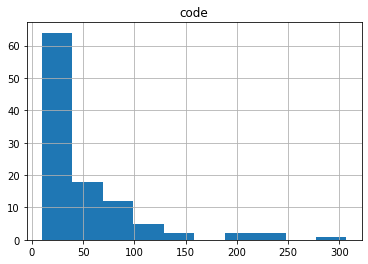

In [202]:
histogram_df = pd.DataFrame()
histogram_df['code'] = code_count
histogram_df.hist(bins = 10)
plt.show()

In [203]:
max_code_len = 100
max_summary_len =25

# Extract the codes and summaries within the maximum length
import numpy as np

cleaned_code = np.array(df_code_p['code'])
cleaned_summary= np.array(df_code_p['docstring'])

short_text = []
short_summary = []

for i in range(len(cleaned_code)):
  if len(cleaned_summary[i].split()) <= max_summary_len and len(cleaned_code[i].split()) <= max_code_len:
    short_text.append(cleaned_code[i])
    short_summary.append(cleaned_summary[i])

post_code = pd.DataFrame({'code': short_text,'summary': short_summary})
post_code.head(100)

,code,summary
0,function show(url) {\n const location = get('...,show
1,"function(_url,_href){\n if (!_url) ...",check event need delegated
2,function(_config){\n if (!_config) ...,regist rewrite
3,"function(_action,_name){\n var _am ...",regist actions
4,"function(_node,_message){\n var _mo...",send message
5,"function(_target,_message){\n v...",send message to every node in target path
6,"function(_target,_message){\n v...",broadcast to all target descendants
7,function getErrorMessage(errors) {\n if (_.is...,convert errors given by jsonschema
8,function dispose() {\n if (typeof this.destro...,/* @flow
9,function Traverse (vars) {\n\t\t\t\t\t\tObject...,Format Vars


In [204]:
post_code['summary'] = post_code['summary'].apply(lambda x: 'sostok ' + x \
        + ' eostok')

post_code.head(2)

,code,summary
0,function show(url) {\n const location = get('...,sostok show eostok
1,"function(_url,_href){\n if (!_url) ...",sostok check event need delegated eostok


In [205]:
t  = Tokenizer()

fit_text = 'Machine Learning'

t.fit_on_texts(fit_text)

print("Count of characters:",t.word_counts)
print("Length of text:",t.document_count)
print("Character index",t.word_index)
print("Frequency of characters:",t.word_docs)


Count of characters: OrderedDict([('m', 1), ('a', 2), ('c', 1), ('h', 1), ('i', 2), ('n', 3), ('e', 2), ('l', 1), ('r', 1), ('g', 1)])
Length of text: 16
Character index {'n': 1, 'a': 2, 'i': 3, 'e': 4, 'm': 5, 'c': 6, 'h': 7, 'l': 8, 'r': 9, 'g': 10}
Frequency of characters: defaultdict(<class 'int'>, {'m': 1, 'a': 2, 'c': 1, 'h': 1, 'i': 2, 'n': 3, 'e': 2, 'l': 1, 'r': 1, 'g': 1})


In [206]:
# use the pre-processed codes and summaries that are within the maximum length and divide into train and test sets

from sklearn.model_selection import train_test_split
x_train, x_validation, y_train, y_validation = train_test_split(
np.array(post_code["code"]),
np.array(post_code["summary"]),
test_size=0.15,
random_state=0,
shuffle=True,
)

In [207]:
#fit the tokenizer on the code sequences
# we will not consider infrequent words in the vocabulary, as it may add noise
# Hence we omit words which occur only two times ( you can change the threshold to 5 in case of larger datasets)
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Prepare a tokenizer on training data
x_tokenizer = Tokenizer()
x_tokenizer.fit_on_texts(list(x_train))
threshold = 2
cnt_infrequent = 0
total_cnt = 0
for key, value in x_tokenizer.word_counts.items():
    total_cnt = total_cnt + 1
    if value < threshold:
       cnt_infrequent = cnt_infrequent + 1
print("% of not frequent words in vocabulary: ", (cnt_infrequent / total_cnt) * 100)
# Remove the infrequent words
x_tokenizer = Tokenizer(num_words = total_cnt - cnt_infrequent)
x_tokenizer.fit_on_texts(list(x_train))
# Convert the code sequences to integer sequences (integer numbers ranging from 1 to the maximum vocab sizes)
x_train_seqs = x_tokenizer.texts_to_sequences(x_train)
x_validation_seqs = x_tokenizer.texts_to_sequences(x_validation)
# printing the integer sequences
print (x_train_seqs)


% of not frequent words in vocabulary:  44.2159383033419
[[3, 129, 130, 2, 20, 73, 20, 131, 132, 132, 131, 129, 38, 130, 23, 9, 9], [3, 39, 74, 24, 39, 39, 2, 21, 133, 39, 39, 39, 4, 21, 19, 21, 39, 3, 134, 4, 134, 74, 24], [3, 135, 5, 14, 28, 21, 55, 135, 3, 75, 2, 75, 4, 2, 14, 14, 75, 40, 14, 136, 14, 75, 4, 14], [3, 137, 138, 56, 1, 35, 137, 138, 1, 56, 56], [3, 46, 2, 29, 46, 47, 1, 139, 46, 2, 1, 48, 4, 76, 5, 140, 1, 1, 100, 1, 100, 141, 1, 1, 48, 1, 100, 19, 1, 140, 4, 49], [3, 15, 101, 102, 36, 5, 77, 15, 142, 143, 2, 101, 15, 102, 36, 30, 25, 144, 145, 146, 147, 41, 103, 148, 3, 78, 149, 42, 150, 151, 152, 153, 154, 155, 156, 157, 78, 158, 77, 9, 102, 159, 101, 104, 15, 15, 19, 77, 79, 104, 15, 15, 141, 77, 79, 160, 15, 23, 79, 57, 161, 14, 15, 36, 36], [3, 10, 2, 10, 4, 1, 10, 56, 80, 10, 41, 26, 21, 55, 3, 6, 2, 10, 6, 4, 1, 10, 6, 10, 6, 10, 6, 1], [3, 1, 162, 49, 1, 162, 55, 1, 58, 1, 1, 31, 103, 59, 1, 55, 1, 58, 1, 1], [3, 81, 5, 163, 81, 1, 10, 81, 1, 10, 164, 163, 3, 

In [208]:
# Pad zero upto maximum length
x_train = pad_sequences(x_train_seqs,  maxlen=max_code_len, padding='post')
x_validation = pad_sequences(x_validation_seqs, maxlen=max_code_len, padding='post')

# Size of vocabulary (+1 for padding token)
x_voc = x_tokenizer.num_words + 1

print("Size of vocabulary in X = {}".format(x_voc))


Size of vocabulary in X = 218


In [209]:
#fit the tokenizer on the summary sequences
y_tokenizer = Tokenizer()
y_tokenizer.fit_on_texts(list(y_train))

threshold = 2
cnt_infrequent = 0
total_cnt = 0

for key, value in y_tokenizer.word_counts.items():
    total_cnt = total_cnt + 1
    if value < threshold:
        cnt_infrequent = cnt_infrequent + 1

y_tokenizer = Tokenizer(num_words = total_cnt - cnt_infrequent)
y_tokenizer.fit_on_texts(list(y_train))

y_train_seqs = y_tokenizer.texts_to_sequences(y_train)
y_validation_seqs = y_tokenizer.texts_to_sequences(y_validation)

y_train = pad_sequences(y_train_seqs,  maxlen=max_summary_len, padding='post')
y_validation = pad_sequences(y_validation_seqs, maxlen=max_summary_len, padding='post')

y_voc = y_tokenizer.num_words + 1
print("Size of vocabulary in Y = {}".format(y_voc))


Size of vocabulary in Y = 61


In [210]:
print(len(x_train))
print(len(y_train))
print(len(x_validation))
print(len(y_validation))

37
37
7
7


In [211]:
# vocab sizes for x and y are 356 ans 105, hence highest integer value would be less than that. Also the maximum lengths of x and y are different
print((x_train[0]))
print((y_train[0]))


[  3 129 130   2  20  73  20 131 132 132 131 129  38 130  23   9   9   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0]
[1 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [212]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, \
Concatenate, TimeDistributed
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping

In [213]:
latent_dim = 300
embedding_dim = 200
# Encoder
encoder_inputs = Input(shape=(max_code_len, ))

# Embedding layer
enc_emb = Embedding(x_voc, embedding_dim,
trainable=True)(encoder_inputs)

# Encoder LSTM 1
encoder_lstm1 = LSTM(latent_dim, return_sequences=True,
return_state=True, dropout=0.4,
recurrent_dropout=0.4)
(encoder_output1, state_h1, state_c1) = encoder_lstm1(enc_emb)

# Encoder LSTM 2
encoder_lstm2 = LSTM(latent_dim, return_sequences=True,
return_state=True, dropout=0.4,
recurrent_dropout=0.4)
(encoder_output2, state_h2, state_c2) = encoder_lstm2(encoder_output1)

# Encoder LSTM 3
encoder_lstm3 = LSTM(latent_dim, return_state=True,
return_sequences=True, dropout=0.4,
recurrent_dropout=0.4)
(encoder_outputs, state_h, state_c) = encoder_lstm3(encoder_output2)

# Set up the decoder, using encoder_states as the initial state
decoder_inputs = Input(shape=(None, ))

# Embedding layer
dec_emb_layer = Embedding(y_voc, embedding_dim, trainable=True)
dec_emb = dec_emb_layer(decoder_inputs)

# Decoder LSTM
decoder_lstm = LSTM(latent_dim, return_sequences=True,
return_state=True, dropout=0.4,
recurrent_dropout=0.2)
(decoder_outputs, decoder_fwd_state, decoder_back_state) = \
decoder_lstm(dec_emb, initial_state=[state_h, state_c])

# Dense layer
decoder_dense = TimeDistributed(Dense(y_voc, activation='softmax'))
decoder_outputs = decoder_dense(decoder_outputs)

# Define the model
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 100)]        0           []                               
                                                                                                  
 embedding_2 (Embedding)        (None, 100, 200)     43600       ['input_6[0][0]']                
                                                                                                  
 lstm_4 (LSTM)                  [(None, 100, 300),   601200      ['embedding_2[0][0]']            
                                 (None, 300),                                                     
                                 (None, 300)]                                                     
                                                                                            

In [228]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)

history = model.fit(
[x_train, y_train[:, :-1]],
y_train.reshape(y_train.shape[0], y_train.shape[1], 1)[:, 1:],
epochs=50,
callbacks=[es],
batch_size=128,
validation_data=([x_validation, y_validation[:, :-1]],
y_validation.reshape(y_validation.shape[0], y_validation.shape[1], 1)[:, 1:]),
)


Epoch 1/50
1/1 [==============================] - 17s 17s/step - loss: 0.7932 - val_loss: 0.7374
Epoch 2/50
1/1 [==============================] - 4s 4s/step - loss: 0.8282 - val_loss: 1.1480
Epoch 3/50
1/1 [==============================] - 4s 4s/step - loss: 1.1651 - val_loss: 0.8191
Epoch 4/50
1/1 [==============================] - 4s 4s/step - loss: 1.0136 - val_loss: 0.8922
Epoch 5/50
1/1 [==============================] - 6s 6s/step - loss: 1.0618 - val_loss: 0.7079
Epoch 6/50
1/1 [==============================] - 4s 4s/step - loss: 0.9009 - val_loss: 0.6922
Epoch 7/50
1/1 [==============================] - 4s 4s/step - loss: 0.7931 - val_loss: 0.6856
Epoch 8/50
1/1 [==============================] - 4s 4s/step - loss: 0.7589 - val_loss: 0.6973
Epoch 9/50
1/1 [==============================] - 4s 4s/step - loss: 0.7394 - val_loss: 0.6996
Epoch 10/50
1/1 [==============================] - 4s 4s/step - loss: 0.7392 - val_loss: 0.7049
Epoch 11/50
1/1 [==============================

In [229]:
# for prediction, define the decoding sequence

reverse_target_word_index = y_tokenizer.index_word
reverse_source_word_index = x_tokenizer.index_word
target_word_index = y_tokenizer.word_index
encoder_model = Model(inputs=encoder_inputs, outputs=[encoder_outputs,
state_h, state_c])

# Decoder setup

# Below tensors will hold the states of the previous time step
decoder_state_input_h = Input(shape=(latent_dim, ))
decoder_state_input_c = Input(shape=(latent_dim, ))
decoder_hidden_state_input = Input(shape=(max_code_len, latent_dim))

# Get the embeddings of the decoder sequence
dec_emb2 = dec_emb_layer(decoder_inputs)

# To predict the next word in the sequence, set the initial states to the states from the previous time step
(decoder_outputs2, state_h2, state_c2) = decoder_lstm(dec_emb2,
initial_state=[decoder_state_input_h, decoder_state_input_c])

# A dense softmax layer to generate prob dist. over the target vocabulary
decoder_outputs2 = decoder_dense(decoder_outputs2)

# Final decoder model
decoder_model = Model([decoder_inputs] + [decoder_hidden_state_input,
decoder_state_input_h, decoder_state_input_c],
[decoder_outputs2] + [state_h2, state_c2])

In [230]:
# generating the decoded sequence

def decode_sequence(input_seq):

    # Encode the input as state vectors.
    (e_out, e_h, e_c) = encoder_model.predict(input_seq)

    # Generate empty target sequence of length 1
    target_seq = np.zeros((1, 1))

    # Populate the first word of target sequence with the start word.
    target_seq[0, 0] = target_word_index['sostok']

    stop_condition = False
    decoded_sentence = ''

    while not stop_condition:
        (output_tokens, h, c) = decoder_model.predict([target_seq]
                + [e_out, e_h, e_c])

        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = reverse_target_word_index[sampled_token_index]

        if sampled_token != 'eostok':
            decoded_sentence += ' ' + sampled_token

        # Exit condition: either hit max length or find the stop word.
        if sampled_token == 'eostok' or len(decoded_sentence.split()) \
            >= max_summary_len - 1:
            stop_condition = True

        # Update the target sequence (of length 1)
        target_seq = np.zeros((1, 1))
        target_seq[0, 0] = sampled_token_index

        # Update internal states
        (e_h, e_c) = (h, c)

    return decoded_sentence

In [231]:
def seq2summary(input_seq):
    newString = ''
    for i in input_seq:
        if i != 0 and i != target_word_index['sostok'] and i \
        != target_word_index['eostok']:
            newString = newString + reverse_target_word_index[i] + ' '

    return newString


# To convert sequence to text
def seq2text(input_seq):
    newString = ''
    for i in input_seq:
        if i != 0:
            newString = newString + reverse_source_word_index[i] + ' '

    return newString

In [232]:
for i in range(10, 15):
    print ('Code:', seq2text(x_train[i]))
    print ('Original summary:', seq2summary(y_train[i]))
    print ('Predicted summary:', decode_sequence(x_train[i].reshape(1,
    max_code_len)))
    print ('\n')


Code: function if in conf if in conf log process env node logger plugin conf log plugin if in conf log process env node logger level conf log level if in conf log for var key in conf log customlevels process env logger level ' key conf log customlevels key 
Original summary: of 
Predicted summary:  the a in in opts or param param param


Code: function map var key for key in map if map hasownproperty key this init key map key return this 
Original summary: subviews with a map of subview keys to additional options param object map return subviewmanager 
Predicted summary:  the a in in opts or param param param


Code: function message this message message this true error this arguments 
Original summary: param string message constructor 
Predicted summary:  the a in in opts or param param param


Code: function dispose if typeof this destroy 'function' this destroy else if typeof this stop 'function' this stop else if typeof this kill 'function' this kill else if typeof this end 'functi